In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numba import jit
#import pymc as pm
from scipy.integrate import odeint

%matplotlib inline

In [319]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recoverd_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

df_confirmed = pd.read_csv(confirmed_url)
df_deaths = pd.read_csv(deaths_url)
df_recovered = pd.read_csv(recoverd_url)

In [ ]:
"""
link = 'https://datasource.kapsarc.org/api/records/1.0/search/?dataset=saudi-arabia-coronavirus-disease-covid-19-situation&q=&facet=daily_cumulative&facet=indicator&facet=date&facet=event&facet=region&facet=city'

# json_url = urlopen(url)
resp = requests.get(link)
data = resp.json()

data2=data['records']
data2

for result in data['records']:
    result['case']=result['fields']['cases']
#     result[u'lng']=result[u'location'][u'lng']
#     del result[u'location']

"""

In [3]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,852,853,853,853,853,854,854,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,118,130,138,140,142,148,155,166,172,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,632,639,659,661,662,671,683,688,693,698
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,591,632,705,728,844,885,902,909,919,922
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,162,163,176,176,176,197,197,210,210,247
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399


In [4]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,426,446,451,471,478,491,504,546,548,569
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,35,36,36,36,36,37,38,39,42,43
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,741,751,760,767,777,788,799,811,825,837
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,51,51,51,51,51,52,52,52,52,52
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,5,6,6,6,6,7,8,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,136,139,160,164,208,214,244,248,251,254
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,2,2,2,2,2,3,3,5,5,5
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,49,49,50,50,50,50,51,51,51,52


In [5]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,780,781,781,781,789,789,791,792,792,792
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,41,42,61,61,64,64,64,64,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,146,156,176,177,177,182,188,191,199,203
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,23,28,39,53,79,91,271,273,288,328
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,97,97,114,114,114,127,127,129,129,159
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,3062,3158,3288,3409,3503,3624,3700,3762,3830,3894


In [6]:
df_confirmed_sa=df_confirmed.loc[df_confirmed['Country/Region'].str.lower() == 'saudi arabia']
df_recovered_sa=df_recovered.loc[df_recovered['Country/Region'].str.lower() == 'saudi arabia']
df_deaths_sa=df_deaths.loc[df_deaths['Country/Region'].str.lower() == 'saudi arabia']

In [7]:
df_confirmed_sa

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
192,NaN,Saudi Arabia,24.0,45.0,0,0,0,0,0,0,...,116021,119942,123308,127541,132048,136315,141234,145991,150292,154233


In [8]:
df_recovered_sa

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
190,NaN,Saudi Arabia,24.0,45.0,0,0,0,0,0,0,...,80019,81029,82548,84720,87890,89540,91662,93915,95764,98917


In [9]:
df_deaths_sa

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
192,NaN,Saudi Arabia,24.0,45.0,0,0,0,0,0,0,...,857,893,932,972,1011,1052,1091,1139,1184,1230


In [10]:
df_confirmed_saT=df_confirmed_sa.T[4:]
df_confirmed_saT=df_confirmed_saT.rename(columns={df_confirmed_saT.columns[0]: 'Confirmed'})

df_recovered_saT=df_recovered_sa.T[4:]
df_recovered_saT=df_recovered_saT.rename(columns={df_recovered_saT.columns[0]: 'Recovered'})

df_deaths_saT=df_deaths_sa.T[4:]
df_deaths_saT=df_deaths_saT.rename(columns={df_deaths_saT.columns[0]: 'Deaths'})

In [54]:
result = pd.concat([df_confirmed_saT,df_recovered_saT,df_deaths_saT], axis=1, sort=False)

result['active'] = result['Confirmed'] - result['Deaths'] - result['Recovered']

In [55]:
result["new_cases"] = result["Confirmed"].diff()

In [57]:
result.index.names = ['Date']
result=result.reset_index()
# result=result.rename(columns={result.columns[0]: 'Confirmed', result.columns[1]: 'Deaths', result.columns[2]: 'Recovered' })

In [58]:
result["Date"]= pd.to_datetime(result["Date"]) 

In [83]:
result

,Date,Confirmed,Recovered,Deaths,active,new_cases
0,2020-01-22,0,0,0,0,NaN
1,2020-01-23,0,0,0,0,0
2,2020-01-24,0,0,0,0,0
3,2020-01-25,0,0,0,0,0
4,2020-01-26,0,0,0,0,0
...,...,...,...,...,...,...
146,2020-06-16,136315,89540,1052,45723,4267
147,2020-06-17,141234,91662,1091,48481,4919
148,2020-06-18,145991,93915,1139,50937,4757
149,2020-06-19,150292,95764,1184,53344,4301


Text(0, 0.5, 'Number of cases')

<Figure size 432x288 with 0 Axes>

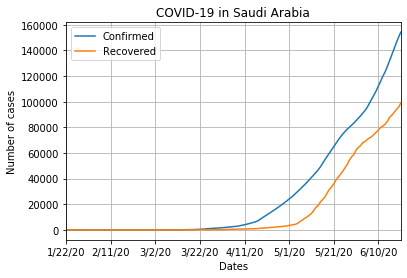

In [40]:
fig = plt.figure()
result.set_index('Date')[['Confirmed','Recovered']].plot(legend=True, grid=True);
plt.title("COVID-19 in Saudi Arabia")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

In [184]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'Confirmed': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', alpha=1 ,label='Confirmed Cases')
    df.set_index('dates')['Confirmed'].plot(legend=True, grid=True, alpha=0.5,label='Predicted Cases')
    plt.title("COVID-19 in Saudi Arabia ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [181]:
import datetime

days = 60
dfConfirmed = result[result['Confirmed'] != 0]

XTrain = np.arange(0, len(dfConfirmed['Date']))
yTrain = dfConfirmed['Confirmed']

XPredict = np.arange(0, len(XTrain) + days)

XRealCases = dfConfirmed['Date']
yRealCases = dfConfirmed['Confirmed']

predictedDays = pd.date_range(dfConfirmed['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(dfConfirmed['Date'], predictedDays)



In [182]:
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

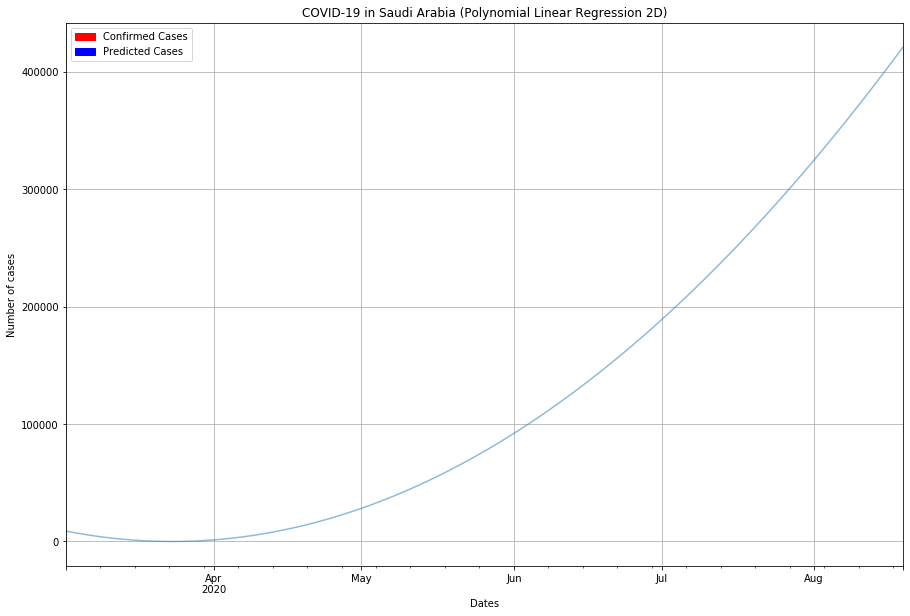

In [183]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

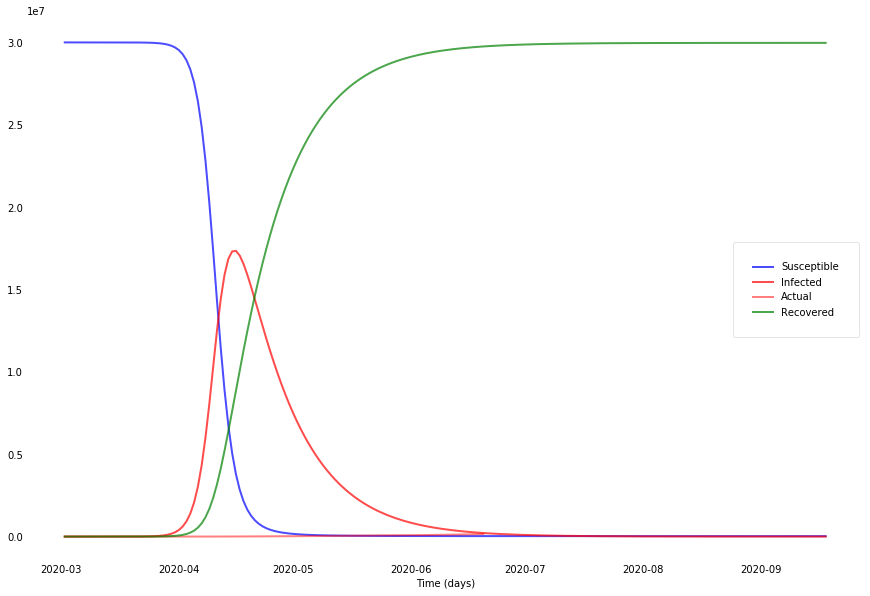

In [308]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import datetime

days = 90

dfConfirmed = result[result['Confirmed'] != 0]
#dfForPlotDaysWithInfected = dfForPlotDaysWithInfected[10:]

XRealCases = dfConfirmed['Date']
yRealCases = dfConfirmed['Confirmed']

predictedDays = pd.date_range(dfConfirmed['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(dfConfirmed['Date'], predictedDays)


# Total population, N.
N = 30000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = dfConfirmed['Confirmed'].iloc[0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 1./14

# A grid of time points (in days)
t = np.linspace(0, len(X), len(X))

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
plotseird(X, S, I, R,XRealCases,yRealCases)
# plt.rcParams["figure.figsize"] = [15, 10]
# # plotGraph(X, I, XRealCases, yRealCases, "SIR")
# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
# ax.plot(X, S/30000000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(X, I/30000000, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(X, R/30000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
# ax.plot(XRealCases, yRealCases/30000000, 'r', alpha=0.5, lw=2, label='Actual')
# ax.set_xlabel('Time /days')
# ax.set_ylabel('Number (30,000,000)')
# # ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
# plt.show()

In [92]:
# dfConfirmed['Confirmed'].iloc[0]

1

In [309]:
def plotseird(t, S, I, R, XReal, yReal, E=None):
    f, ax = plt.subplots(1,1,figsize=(15,10))
    
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    if E is not None:
        ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(XReal, yReal, 'r', alpha=0.5, lw=2, label='Actual')

    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();


In [310]:
# ret.T.show()
dfConfirmed = result[result['Confirmed'] != 0]
#dfForPlotDaysWithInfected = dfForPlotDaysWithInfected[10:]

XRealCases = dfConfirmed['Date']
yRealCases = dfConfirmed['Confirmed']
def deriv2(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [311]:
N = 30000000
beta = 1.0  # infected person infects 1 other person per day
D = 14.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 14.0  # incubation period of three days

#  initial conditions: one exposed, rest susceptible
I0, R0 , E0 = dfConfirmed['Confirmed'].iloc[0], 0, 1

S0 = N - I0 - R0 - E0

In [312]:
# t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector
t = np.linspace(0, len(X), len(X))

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv2, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

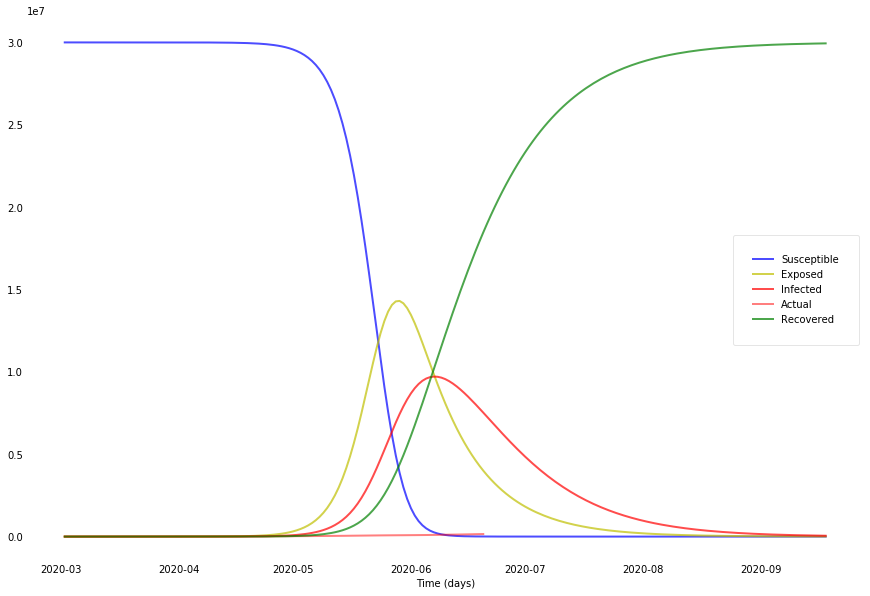

In [314]:
plotseird(X, S, I, R,XRealCases,yRealCases,E)

In [317]:
print(I)

[1.00000000e+00 1.03212566e+00 1.12472438e+00 1.27551931e+00
 1.48619016e+00 1.76194940e+00 2.11139691e+00 2.54660660e+00
 3.08341950e+00 3.74193397e+00 4.54719760e+00 5.53011710e+00
 6.72861420e+00 8.18906711e+00 9.96809000e+00 1.21347166e+01
 1.47730715e+01 1.79856306e+01 2.18971976e+01 2.66597494e+01
 3.24583388e+01 3.95182835e+01 4.81139191e+01 5.85792589e+01
 7.13209711e+01 8.68341801e+01 1.05721703e+02 1.28717474e+02
 1.56715054e+02 1.90802351e+02 2.32303882e+02 2.82832223e+02
 3.44350648e+02 4.19249381e+02 5.10438420e+02 6.21460530e+02
 7.56628777e+02 9.21193942e+02 1.12154827e+03 1.36547345e+03
 1.66244233e+03 2.02398614e+03 2.46414113e+03 2.99999192e+03
 3.65233235e+03 4.44646888e+03 5.41319719e+03 6.58998878e+03
 8.02243217e+03 9.76598227e+03 1.18880825e+04 1.44707370e+04
 1.76136253e+04 2.14378697e+04 2.60905838e+04 3.17503574e+04
 3.86338517e+04 4.70037111e+04 5.71780205e+04 6.95415617e+04
 8.45591415e+04 1.02791268e+05 1.24912429e+05 1.51732187e+05
 1.84219164e+05 2.235278

In [ ]:
"""
from fbprophet import Prophet
# ! pip install fbprophet

confirmed = result[['Date','Confirmed']]
confirmed["Date"]= pd.to_datetime(confirmed["Date"]) 
confirmed=confirmed.rename(columns={confirmed.columns[0]: 'ds', confirmed.columns[1]: 'y'})

confirmed

m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()


forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

"""